In [33]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Library to extract datetime features
import datetime as dt

In [34]:
# loading the data

df = pd.read_csv("https://raw.githubusercontent.com/waleolajumoke/uberdataanalysis/main/uber.csv")
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [35]:
df.shape

(29101, 13)

In [36]:
# checking data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [37]:
df.isnull().sum()

pickup_dt       0
borough      3043
pickups         0
spd             0
vsb             0
temp            0
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

In [38]:
# statistical summary
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.215903,5.984924,8.818125,47.669042,30.823065,1017.817938,0.003830,0.026129,0.090464,2.529169
std,995.649536,3.699007,2.442897,19.814969,21.283444,7.768796,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,2.000000,-16.000000,991.400000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.000000,30.000000,1018.200000,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1043.400000,0.280000,1.240000,2.100000,19.000000


In [39]:
df.describe(exclude = 'number')

,pickup_dt,borough,hday
count,29101,26058,29101
unique,4343,6,2
top,2015-01-01 01:00:00,Bronx,N
freq,7,4343,27980


In [40]:
# checking unique value
df["hday"].unique()

array(['Y', 'N'], dtype=object)

In [41]:
df["borough"].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       nan], dtype=object)

In [42]:
# number of unique values for each location
df["borough"].value_counts()

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: count, dtype: int64

In [43]:
# trip during holiday vs non holiday
df["hday"].value_counts()

hday
N    27980
Y     1121
Name: count, dtype: int64

In [44]:
# converting pickup date to date time
df["pickup_dt"]= pd.to_datetime(df["pickup_dt"])
df["pickup_dt"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       29101 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


In [45]:
# conversion
df.pickup_dt = pd.to_datetime(df.pickup_dt)

# extracting month, day
df["day_name"] = df.pickup_dt.dt.day_name()
df["month_name"] = df.pickup_dt.dt.month_name()
df["start_hour"] = df.pickup_dt.dt.hour
df["day"] = df.pickup_dt.dt.day
df["year"] = df.pickup_dt.dt.year


In [46]:
df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,day_name,month_name,start_hour,day,year
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,Tuesday,June,23,30,2015
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,Tuesday,June,23,30,2015
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,Tuesday,June,23,30,2015
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,Tuesday,June,23,30,2015


In [47]:
# removing pickup date column
df = df.drop("pickup_dt", axis=1)
df.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,day_name,month_name,start_hour,day,year
0,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
1,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
2,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
3,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015
4,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y,Thursday,January,1,1,2015


In [51]:
# handling missing data in borough
df["borough"].value_counts(normalize=True,dropna=False)

borough
Bronx            0.149239
Brooklyn         0.149239
EWR              0.149239
Manhattan        0.149239
Queens           0.149239
Staten Island    0.149239
NaN              0.104567
Name: proportion, dtype: float64

In [ ]:
# changing missing value to unknown
df["borough"] = df["borough"].fillna("Unknown")

In [52]:
df["borough"].value_counts()

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: count, dtype: int64

In [53]:
# checking moissing values
df.isnull().sum()

borough       3043
pickups          0
spd              0
vsb              0
temp             0
dewp             0
slp              0
pcp01            0
pcp06            0
pcp24            0
sd               0
hday             0
day_name         0
month_name       0
start_hour       0
day              0
year             0
dtype: int64

In [55]:
# counting total of trip on holiday vs non holiday
holiday = df["hday"].value_counts()
holiday

hday
N    27980
Y     1121
Name: count, dtype: int64

<Axes: xlabel='hday', ylabel='count'>

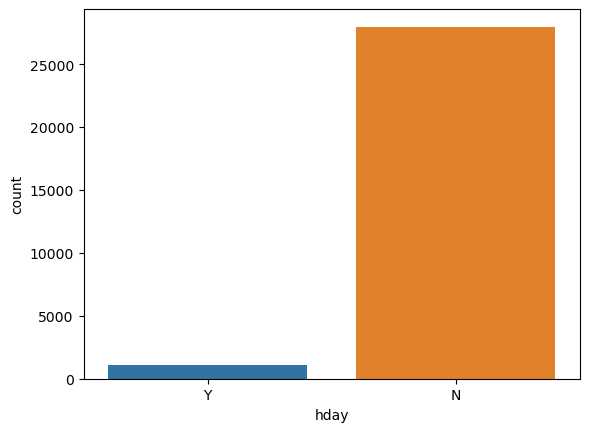

In [56]:
# ploting trip on holiday vs non holiday
# univeriate analysis
sns.countplot(df, x="hday")

In [67]:
# multivariate analysis
num_var = ['spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01', 'pcp06', 'pcp24', 'sd']
df[num_var].corr()

,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
spd,1.000000,0.089056,-0.294548,-0.321730,-0.091698,-0.000250,0.016266,-0.010563,0.097919
vsb,0.089056,1.000000,0.023981,-0.232188,0.165451,-0.487121,-0.117681,0.000323,-0.048110
temp,-0.294548,0.023981,1.000000,0.896665,-0.224439,-0.012767,-0.037722,-0.014382,-0.548750
dewp,-0.321730,-0.232188,0.896665,1.000000,-0.310104,0.115585,0.012435,0.001250,-0.492485
slp,-0.091698,0.165451,-0.224439,-0.310104,1.000000,-0.088466,-0.103059,-0.133964,0.123538
pcp01,-0.000250,-0.487121,-0.012767,0.115585,-0.088466,1.000000,0.126185,0.001017,-0.000974
pcp06,0.016266,-0.117681,-0.037722,0.012435,-0.103059,0.126185,1.000000,0.253583,0.040092
pcp24,-0.010563,0.000323,-0.014382,0.001250,-0.133964,0.001017,0.253583,1.000000,0.070604
sd,0.097919,-0.048110,-0.548750,-0.492485,0.123538,-0.000974,0.040092,0.070604,1.000000


In [ ]:
##### observation weather variable doesnt affect pickup

In [68]:
num_var = ['pickups', 'spd', 'vsb', 'temp', 'dewp', 'slp', 'pcp01','pcp06', 'pcp24', 'sd']
corr = df[num_var].corr()
corr

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickups,1.000000,0.011103,-0.007484,0.054857,0.033456,-0.015011,0.004406,-0.002909,-0.020219,-0.008241
spd,0.011103,1.000000,0.089056,-0.294548,-0.321730,-0.091698,-0.000250,0.016266,-0.010563,0.097919
vsb,-0.007484,0.089056,1.000000,0.023981,-0.232188,0.165451,-0.487121,-0.117681,0.000323,-0.048110
temp,0.054857,-0.294548,0.023981,1.000000,0.896665,-0.224439,-0.012767,-0.037722,-0.014382,-0.548750
dewp,0.033456,-0.321730,-0.232188,0.896665,1.000000,-0.310104,0.115585,0.012435,0.001250,-0.492485
slp,-0.015011,-0.091698,0.165451,-0.224439,-0.310104,1.000000,-0.088466,-0.103059,-0.133964,0.123538
pcp01,0.004406,-0.000250,-0.487121,-0.012767,0.115585,-0.088466,1.000000,0.126185,0.001017,-0.000974
pcp06,-0.002909,0.016266,-0.117681,-0.037722,0.012435,-0.103059,0.126185,1.000000,0.253583,0.040092
pcp24,-0.020219,-0.010563,0.000323,-0.014382,0.001250,-0.133964,0.001017,0.253583,1.000000,0.070604
sd,-0.008241,0.097919,-0.048110,-0.548750,-0.492485,0.123538,-0.000974,0.040092,0.070604,1.000000


<Axes: >

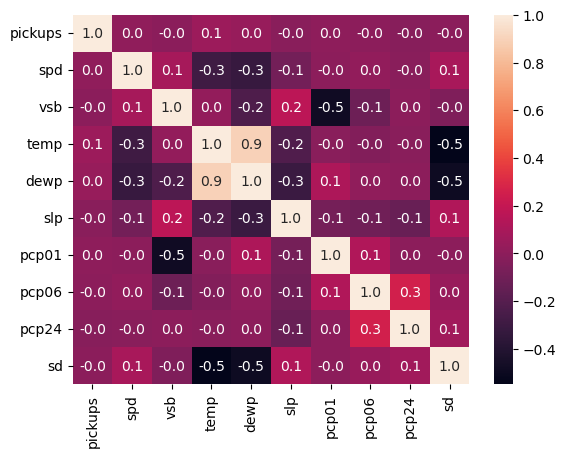

In [69]:
sns.heatmap(corr, annot=True, fmt = ".1f")

/var/folders/4f/0n7lvgq173jbhnppwmh13mf00000gn/T/ipykernel_2740/808659267.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(df, x="month_name", y="pickups", color="red", ci=0)


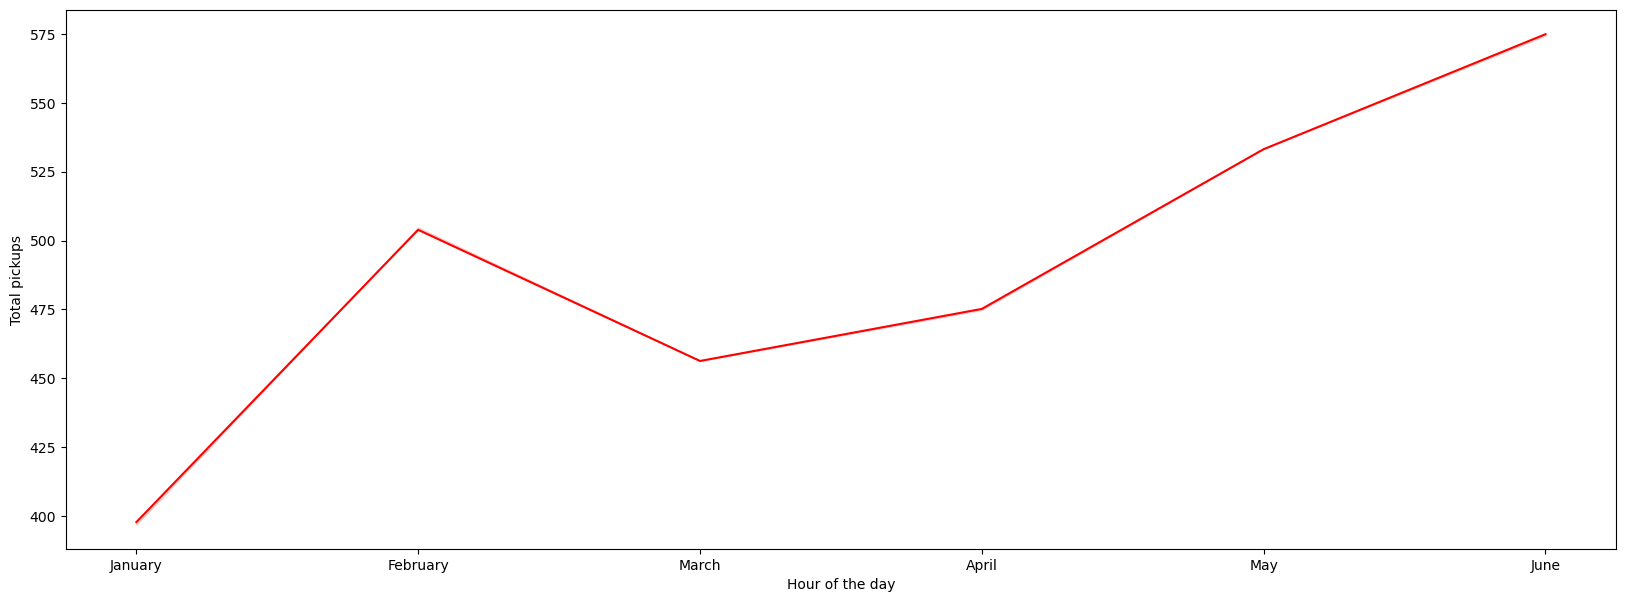

In [71]:

# pickup day of the month
plt.figure(figsize=(20,7))
sns.lineplot(df, x="month_name", y="pickups", color="red", ci=0)
plt.ylabel('Total pickups')
plt.xlabel('Day of the day')
plt.show()

/var/folders/4f/0n7lvgq173jbhnppwmh13mf00000gn/T/ipykernel_2740/2956549916.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(df, x="day_name", y="pickups", color="red", ci=0,)


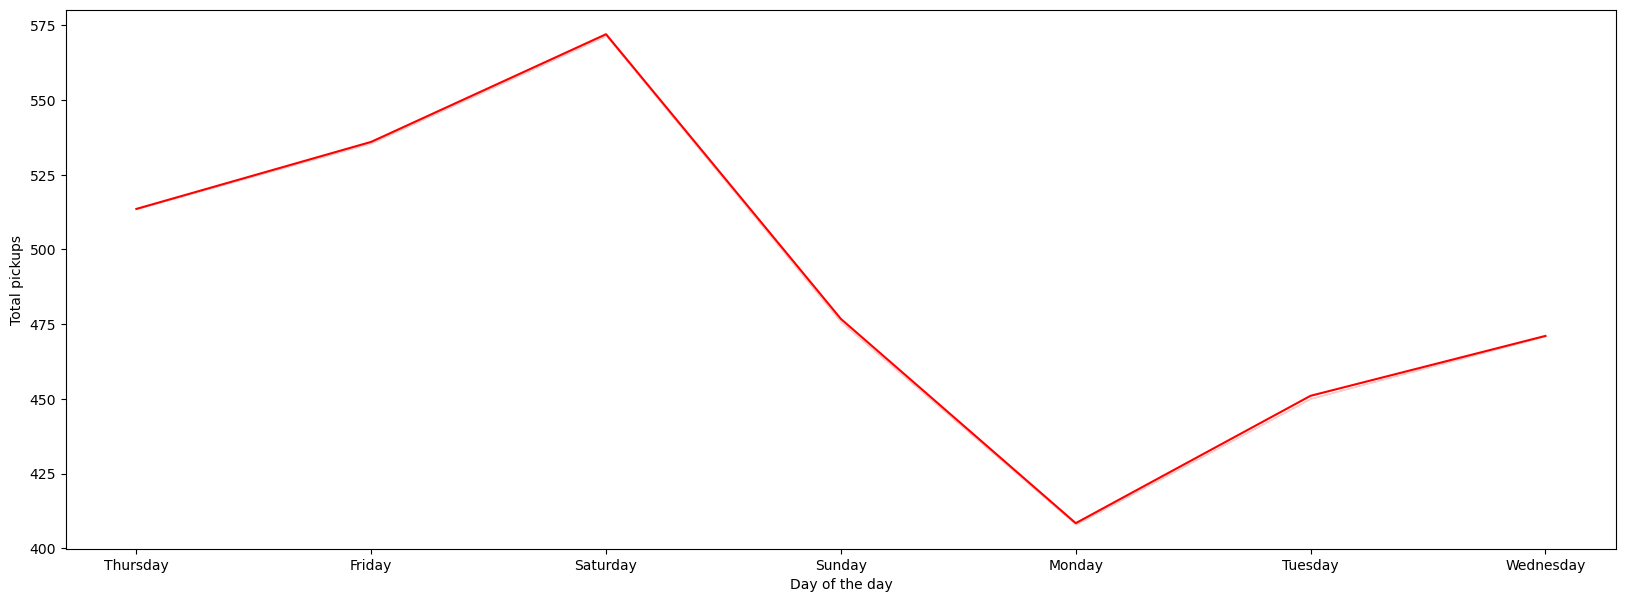

In [74]:
plt.figure(figsize=(20,7))
sns.lineplot(df, x="day_name", y="pickups", color="red", ci=0,)
plt.ylabel('Total pickups')
plt.xlabel('Day of the day')
plt.show()

/var/folders/4f/0n7lvgq173jbhnppwmh13mf00000gn/T/ipykernel_2740/2644934572.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(df, x="start_hour", y="pickups", color="red", ci=0, hue="borough")


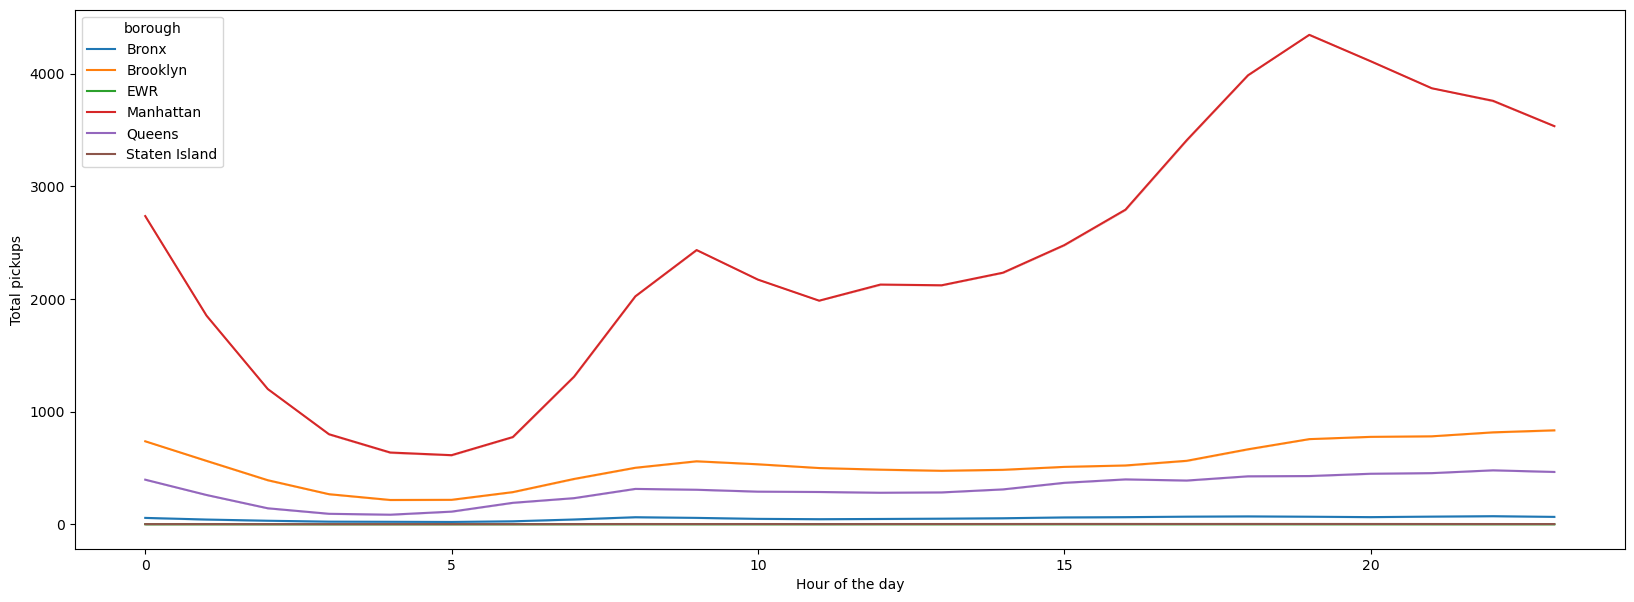

In [75]:
plt.figure(figsize=(20,7))
sns.lineplot(df, x="start_hour", y="pickups", color="red", ci=0, hue="borough")
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.show()